# Visualising Insights

1. Importing libraries and dataset
2. Sampling data [using .random.seed() and .random.rand()]
3. Sales distribution across each day over the week [using .plot.hist(bins)]
4. Sales distribution across each hour over the day [using .plot.hist(bins)]
5. Price spent over the hours of the day [using .groupby(), .agg(), .plot.bar(legend)]
6. Department orders at the busiest hour of the day [using .groupby(), .agg(), .plot.bar(legend)]
7. Distribution of orders among customers in terms of loyalty [using .plot.barh()]
8. Expenditure during different hours of the day [using sns.lineplot()]
9. Relationship between Age and Income [using sns.scatterplot()]

## 1. Importing libraries and dataset

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
%run EnvFile.ipynb

Stored 'path' (str)


In [3]:
# Import dataset

df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_dept_customers.pkl'))

In [4]:
# Checking columns, rows, datatypes of df

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404289 entries, 0 to 32404288
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int32  
 1   user_id                        int32  
 2   order_number                   int8   
 3   order_day_of_week              int8   
 4   order_hour_of_day              int8   
 5   days_since_prior_order         float16
 6   product_id                     int32  
 7   add_to_cart_order              int32  
 8   reordered                      int8   
 9   product_name                   object 
 10  aisle_id                       int8   
 11  department_id                  int8   
 12  prices                         float64
 13  department                     object 
 14  price_range                    object 
 15  day_busyness_level             object 
 16  hour_busyness_level            object 
 17  max_order                      int8   
 18  

## 2. Sampling Data

In [5]:
# Create a list holding True/False values to the condition provided

np.random.seed(4)
dev = np.random.rand(len(df_all)) <= 0.7

In [6]:
# Store 70% of the sample in big df

df_big_subset = df_all[dev]

In [7]:
# Store 30% of the sample in small df

df_small_subset = df_all[~dev]

In [8]:
# Checking the length of main df

len(df_all)

32404289

In [9]:
# Checking the total length of big and small sample dfs

len(df_big_subset) + len(df_small_subset)

32404289

## 3. Sales distribution across each day over the week

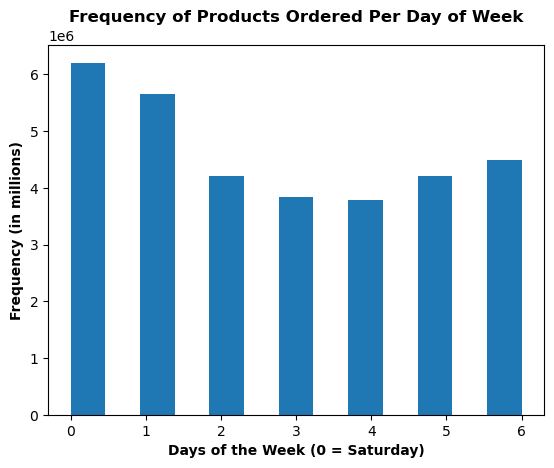

In [10]:
# Creating chart

hist_order_day_of_week = df_all['order_day_of_week'].plot.hist(bins = 13)
plt.title('Frequency of Products Ordered Per Day of Week', fontsize=12, fontweight = 'bold')
plt.xlabel('Days of the Week (0 = Saturday)', fontsize=10, fontweight = 'bold')
plt.ylabel('Frequency (in millions)',fontsize=10, fontweight = 'bold')
plt.show()

## 4. Sales distribution across each hour over the day

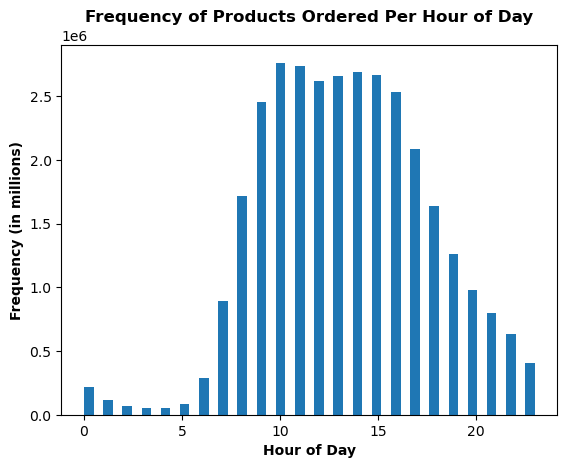

In [11]:
# Creating histograms

hist_order_hour_of_day = df_all['order_hour_of_day'].plot.hist(bins = 47)
plt.xlabel('Hour of Day',fontsize=10, fontweight = 'bold')
plt.ylabel('Frequency (in millions)',fontsize=10, fontweight = 'bold')
plt.title('Frequency of Products Ordered Per Hour of Day',fontsize=12, fontweight = 'bold')
plt.show()

#### Input to senior stakeholders about sales: The above histogram shows that the peak time with high sale is between 10am and 3pm.

In [12]:
# Exporting the chart

hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dist_order_hour_of_day.png'))

## 5. Price spent over the hours of the day

In [13]:
# Finding total price spent based on hour of day

order_hour_price = df_all.groupby('order_hour_of_day').agg({'prices' : ['sum']})

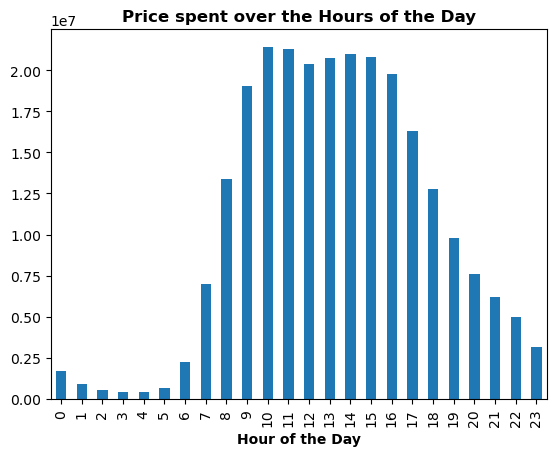

In [14]:
# Creating bar chart for busiest hour of the day based on price

bar_order_hour_price = order_hour_price.plot.bar(legend = None)
plt.title('Price spent over the Hours of the Day', fontsize=12, fontweight = 'bold')
plt.xlabel('Hour of the Day', fontsize=10, fontweight = 'bold')
plt.show()

In [15]:
# Exporting busiest hour of the day based on price chart

bar_order_hour_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_price.png'))

#### 10 is the busiest hour of the day based on price spent.

## 6. Department orders at the busiest hour of the day

In [16]:
# Finding data on department level for the busiest hour of the day, i.e. 10.

busiest_hour_dept = df_all[df_all['order_hour_of_day'] == 10]

In [17]:
# Finding the frequency across departments

busiest_hour_dept['department'].value_counts(dropna = False)

produce            800246
dairy eggs         469220
snacks             262966
beverages          244988
frozen             169769
pantry             158281
bakery              98131
canned goods        90046
deli                88319
dry goods pasta     69190
household           64054
breakfast           62413
meat seafood        57062
personal care       37125
babies              34388
international       22596
alcohol             13394
pets                 7580
missing              5884
bulk                 3086
other                2972
Name: department, dtype: int64

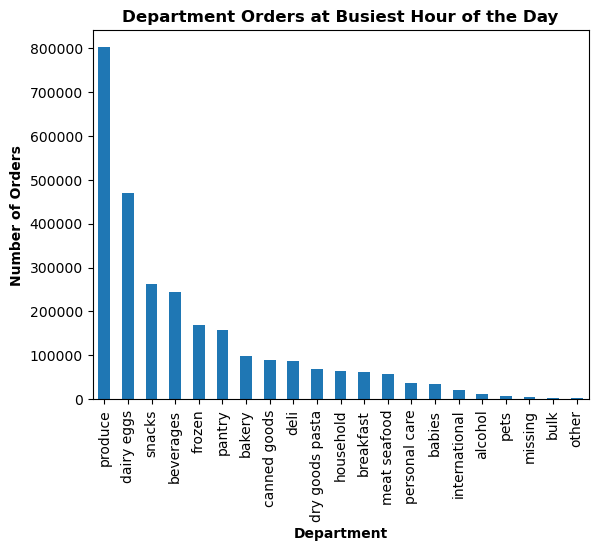

In [18]:
# Creating bar chart for departments at busiest hour of the day

dept_count = busiest_hour_dept['department'].value_counts(dropna=False)
busiest_dept = dept_count.plot.bar()
plt.title('Department Orders at Busiest Hour of the Day', fontsize=12, fontweight = 'bold')
plt.xlabel('Department', fontsize=10, fontweight = 'bold')
plt.ylabel('Number of Orders', fontsize=10, fontweight = 'bold')
plt.show()

In [19]:
# Exporting busiest dept chart

busiest_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_dept.png'))

## 7. Distribution of orders among customers in terms of loyalty

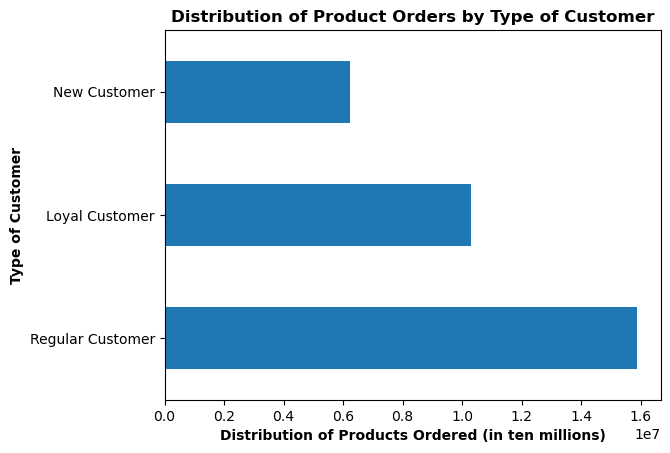

In [20]:
# Creating a bar chart 

bar_loyalty_order_frequency = df_all['loyalty_flag'].value_counts().plot.barh()
plt.xlabel('Distribution of Products Ordered (in ten millions)', fontsize=10, fontweight = 'bold')
plt.ylabel('Type of Customer', fontsize=10, fontweight = 'bold')
plt.title('Distribution of Product Orders by Type of Customer', fontsize=12, fontweight = 'bold')
plt.show()

#### Input to marketing team: The regular customers order the most followed by loyal and new customer categories.

In [21]:
# Exporting the chart

bar_loyalty_order_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_order_frequency.png'))

## 8. Expenditure during different hours of the day

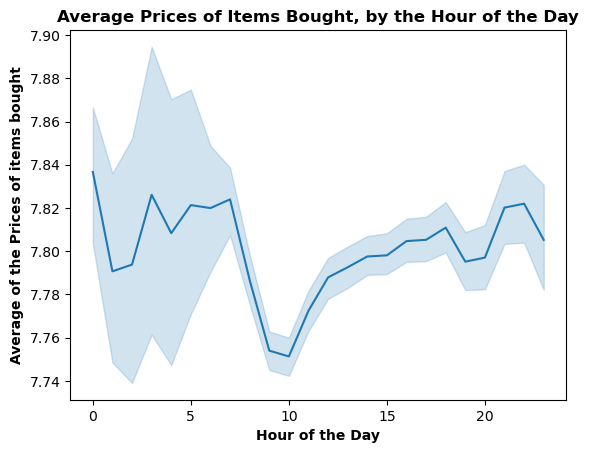

In [22]:
# Creating a Line Chart using the small subset

line_price_order_hour_of_day = sns.lineplot(data = df_small_subset, x = 'order_hour_of_day',y = 'prices')
plt.xlabel('Hour of the Day', fontsize = 10, fontweight = 'bold')
plt.ylabel('Average of the Prices of items bought',fontsize = 10, fontweight = 'bold')
plt.title('Average Prices of Items Bought, by the Hour of the Day',fontsize = 12, fontweight = 'bold')
plt.show()

#### The price expenditure is highest between 1 AM and 5 AM, lowest around 10 AM.

In [23]:
# Exporting the chart

line_price_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_order_hour_of_day.png'))

## 9. Relationship between Age and Income

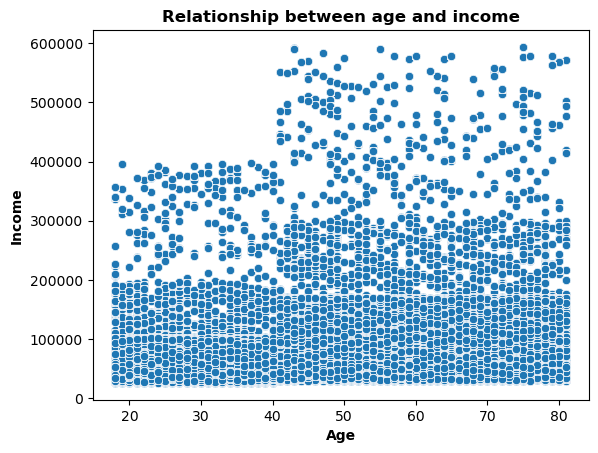

In [24]:
# Creating a scatterplot to find the relationship between age and income

scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_all)
plt.xlabel('Age', fontsize=10, fontweight = 'bold')
plt.ylabel('Income', fontsize=10, fontweight = 'bold')
plt.title('Relationship between age and income', fontsize=12, fontweight = 'bold')
plt.show()

In [25]:
# Exporting the chart

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))